# Deep Learning for Coders - Lesson 1 Notes
Look at the book as well!

### What you don't need, to do deep learning:

|Myth (don't need) | Truth|
|------------------|------|	
Lots of math | Just high school math is sufficient|
Lots of data | We've seen record-breaking results with <50 items of data|
Lots of expensive computers | You can get what you need for state of the art work for free|

### Where is deep learning the best-known approach? (Is there any point learning Deep Learning?)
Deep learning has power, flexibility, and simplicity. That's why we believe it should be applied across many disciplines. These include the social and physical sciences, the arts, medicine, finance, scientific research, and many more. Here's a list of some of the thousands of tasks in different areas at which deep learning, or methods heavily using deep learning, is now the best in the world:

* **Natural language processing (NLP)** Answering questions; speech recognition; summarizing documents; classifying documents; finding names, dates, etc. in documents; searching for articles mentioning a concept

* **Computer vision** Satellite and drone imagery interpretation (e.g., for disaster resilience); face recognition; image captioning; reading traffic signs; locating pedestrians and vehicles in autonomous vehicles

* **Medicine** Finding anomalies in radiology images, including CT, MRI, and X-ray images; counting features in pathology slides; measuring features in ultrasounds; diagnosing diabetic retinopathy

* **Biology** Folding proteins; classifying proteins; many genomics tasks, such as tumor-normal sequencing and classifying clinically actionable genetic mutations; cell classification; analyzing protein/protein interactions

* **Image generation** Colorizing images; increasing image resolution; removing noise from images; converting images to art in the style of famous artists

* **Recommendation systems** Web search; product recommendations; home page layout

* **Playing games** Chess, Go, most Atari video games, and many real-time strategy games

* **Robotics** Handling objects that are challenging to locate (e.g., transparent, shiny, lacking texture) or hard to pick up

* **Other applications** Financial and logistical forecasting, text to speech, and much more...

### Neural Networks: a breif history
n 1943 Warren McCulloch, a neurophysiologist, and Walter Pitts, a logician, teamed up to develop a mathematical model of an artificial neuron. In their paper "A Logical Calculus of the Ideas Immanent in Nervous Activity" they declared that:

> "Because of the 'all-or-none' character of nervous activity, neural events and the relations among them can be treated by means of propositional logic. It is found that the behavior of every net can be described in these terms."


In [19]:
from IPython.display import Image
Image(url= "Images/chapter7_neuron.png")

To learn more about the history (which although important, isn't that necessary to learn), go through the book or online course yourself.

### The Software Stack
 
In the framework of fastai, the product stack is quite minimal, going from the most broad to the least broad below:
* **Python**
    * Extremely extensible, and allows for many framworks to be based ontop of it
* **PyTorch**
  * The fastest growing Machine Learning/Deep Learning framework (With a lot of industry backing). Although less mature compared to TensorFlow, it is backed by large companies, and is easier to work with. Less 'bogged down' and 'bloated'.
  * Most new models and development are done for PyTorch, rather than TensorFlow
* **fastai**
  * A framework built on top of PyTorch, and allows for the easier development of Deep Learning models specifically.
  * Allows for the quicker development (via a higher level API)
  * fastai is incredibly powerful, and it allows for people to learn/develop etc.
    * **Layered API**
      * Allows for people to have a simpler base level, while being able to go deeper (from very high level work, to extremely low level research and state of the art development).

### Getting a GPU deep learning server
Most things require using a GPU (of which has to be a Nvidia GPU, due to the extensive use of CUDA). It is recommended not to buy one right away (or to even set up a GPU that you may have laying around). For this course, I will be using my secondary machine, which I have set up (more because of my interest in hardware and Linux), which has a Nvidia RTX 2060 Super, which is more that suitable to run the necessary work for this course, and beyond. Below I have my secondary system's specifications listed via the good old `neofetch` command. If you cannot afford/have access to a system, use Google Collab to start, and look on the fastai Forum).

In [20]:
from IPython.display import Image
Image(url= "Images/System-Specs.png")

#### Rationale behind my current system
This system was thrown together with an older Dell Optiplex, and an Antec 900 case (which has exemplary cooling), some extra RAM (to be bring it up to 16GB), and adding in a 2060 Super (which is the crown jewel of this machine). This GPU features a good stock overclock, and a good cooling solution (allowing for it to run at full load, with minimal performance loss, and minimal noise).

I chose to use PopOS! compared to my usual Arch install due to most frameworks having better support for Ubuntu based distros, and the fact that I was having trouble getting all of the frameworks working in Arch, and Nvidia Drivers were not playing well either in Arch. PopOS! provided a relatively simple setup experience, and allowed me to get up and running quickly.

### Running Your First Jupyter Notebook!
Here I'll put in the fist piece of code that we are exposed to, and run it.

In [22]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.168823,0.024613,0.008796,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.060930,0.008559,0.005413,00:31


The time it takes to train will depend on the GPU! As I am using quite modern hardware, it took an average time of about 30 seconds per epoch, and this process should not take more than 5 minutes. This is just a test to check that you run code within your environment.

Don't worry if you don't know what is happening in the code, this will be explained later.

This code is fetching the 'pets' dataset (i.e. a dataset which has labelled pictures of cats and dogs), and trying to figure out which one is a cat, and which one is a dog.

After about a minute of training, it is able to identify cats from dogs with about a 0.3% error rate.

Here is a picture of a cat. Now let's try and test the Model that we just created for our selves...

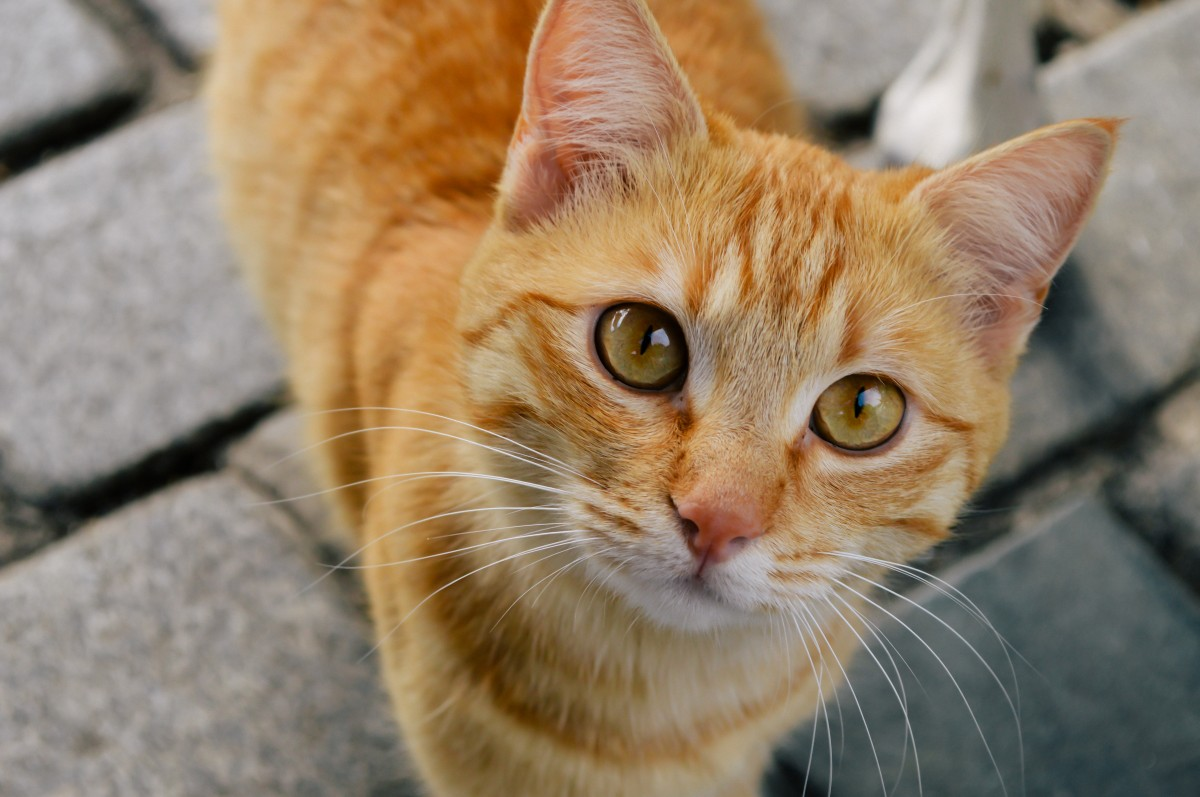

In [26]:
from PIL import Image

Image.open("Images/cat.jpeg")


In [24]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

AssertionError: Expected an input of type in 
  - <class 'pathlib.PosixPath'>
  - <class 'pathlib.Path'>
  - <class 'str'>
  - <class 'torch.Tensor'>
  - <class 'numpy.ndarray'>
  - <class 'bytes'>
  - <class 'fastai.vision.core.PILImage'>
 but got <class 'PIL.JpegImagePlugin.JpegImageFile'>